In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from matplotlib.animation import FFMpegWriter
# from moviepy.editor import VideoFileClip


#Load extracted x,y data
data = pd.read_csv("/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/videos/MVI_0401DLC_resnet50_FES_V1Oct16shuffle1_38000.csv", skiprows=3, header=None)
# data = pd.read_csv("Z:/Student Folders/Jake_Joseph/MVI_0401DLC_resnet50_FES_V1Oct16shuffle1_38000.csv", skiprows=3, header=None)

video_path = "/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/videos/MVI_0401.mp4"




In [6]:
video_path = "Z:/Data/Monkeys/Joker/2023-11-09\Videos\MVI_0401.MOV"

audio_path = "extracted_audio.wav"

video = VideoFileClip(video_path)
audio = video.audio
audio.write_audiofile(audio_path)


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


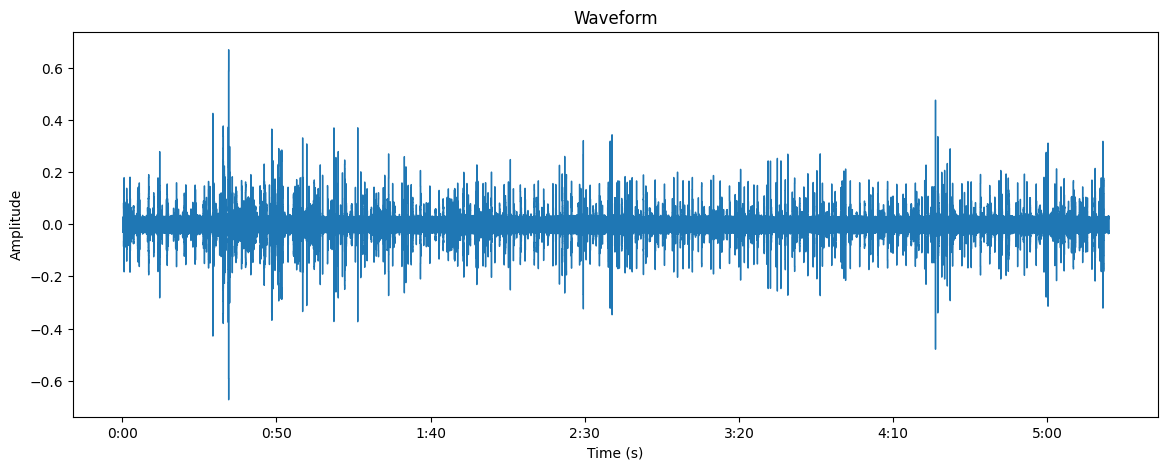

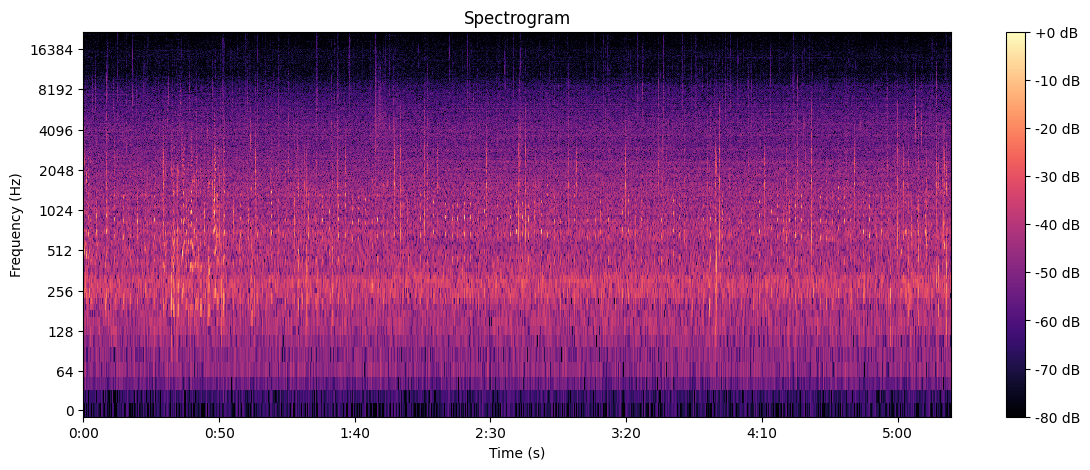

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_path = "extracted_audio.wav"
y, sr = librosa.load(audio_path, sr=None)

# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Plot the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(14, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


In [6]:
import cv2
import keyboard
import numpy as np
import pygame

video_path = "Z:/Data/Monkeys/Joker/2023-11-09/Videos/MVI_0401.MOV"
audio_path = "extracted_audio.wav"

# Initialize Pygame mixer for audio playback
pygame.mixer.init()
pygame.mixer.music.load(audio_path)

video = cv2.VideoCapture(video_path)
fps = video.get(cv2.CAP_PROP_FPS)
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
stim_frames = []

# Flag to track if the key is being held down
key_held = False

def on_press(e):
    global key_held
    if not key_held:
        current_frame = int(video.get(cv2.CAP_PROP_POS_FRAMES))
        stim_frames.append((current_frame, 'on'))
        key_held = True
        print(f"Stim on at frame: {current_frame}")

def on_release(e):
    global key_held
    if key_held:
        current_frame = int(video.get(cv2.CAP_PROP_POS_FRAMES))
        stim_frames.append((current_frame, 'off'))
        key_held = False
        print(f"Stim off at frame: {current_frame}")

# Register the key press and release events
keyboard.on_press_key("space", on_press)
keyboard.on_release_key("space", on_release)

pygame.mixer.music.play()

start_time = pygame.time.get_ticks() / 1000.0  # Get start time in seconds

while True:
    ret, frame = video.read()
    if not ret:
        break

    # Calculate elapsed time and current frame
    elapsed_time = pygame.time.get_ticks() / 1000.0 - start_time
    current_frame = int(elapsed_time * fps)

    # Set the video to the current frame
    video.set(cv2.CAP_PROP_POS_FRAMES, current_frame)

    # Display the frame
    cv2.imshow("Video", frame)

    # Slow down the video by adding a delay (e.g., 30 ms)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()
keyboard.unhook_all()
pygame.mixer.music.stop()

# Create the stim array
stim_array = np.zeros(total_frames, dtype=bool)

# Process the recorded stim frames
for i in range(0, len(stim_frames), 2):
    on_frame = stim_frames[i][0]
    off_frame = stim_frames[i + 1][0] if i + 1 < len(stim_frames) else total_frames
    stim_array[on_frame:off_frame] = True

print("Stim frames:", stim_frames)
print("Stim array:", stim_array)


Stim on at frame: 138
Stim off at frame: 259
Stim on at frame: 342
Stim off at frame: 430
Stim on at frame: 511
Stim off at frame: 600
Stim on at frame: 685
Stim off at frame: 793
Stim on at frame: 983
Stim off at frame: 1086
Stim on at frame: 1341
Stim off at frame: 1441
Stim on at frame: 1560
Stim off at frame: 1676
Stim on at frame: 1733
Stim off at frame: 1804
Stim on at frame: 1911
Stim off at frame: 2009
Stim on at frame: 2086
Stim off at frame: 2183
Stim on at frame: 2220
Stim off at frame: 2347
Stim on at frame: 2407
Stim off at frame: 2484
Stim on at frame: 2569
Stim off at frame: 2641
Stim on at frame: 2701
Stim off at frame: 2830
Stim on at frame: 2899
Stim off at frame: 2987
Stim on at frame: 3046
Stim off at frame: 3133
Stim on at frame: 3182
Stim off at frame: 3265
Stim on at frame: 3316
Stim off at frame: 3391
Stim on at frame: 3444
Stim off at frame: 3536
Stim on at frame: 3591
Stim off at frame: 3674
Stim on at frame: 3729
Stim off at frame: 3810
Stim on at frame: 3871

In [8]:

# Save stim_array to a file
np.save('stim_array.npy', stim_array)

In [ ]:
data.shape[0]
frame = 5*30
stim = np.zeros(data.shape[0])
while frame <data.shape[0]:
    stim[frame:frame + 90] = 180
    frame += 180

print(stim[:500])

In [5]:
def movingAverage(data, window, method='linear'):
    for i in range(1, len(data.columns), 3):
        x = data.columns[i]
        y = data.columns[i+1]
        
        if method == 'linear':
            data[x] = data[x].rolling(window=window, min_periods=1).mean()
            data[y] = data[y].rolling(window=window, min_periods=1).mean()
        elif method == 'exponential':
            data[x] = data[x].ewm(span=window, adjust=False).mean()
            data[y] = data[y].ewm(span=window, adjust=False).mean()
        else:
            raise ValueError("Method must be 'linear' or 'exponential'")

    return data

def interpolate_columns(df, threshold=0.90):
    for i in range(1, len(df.columns), 3):
        likelihood_col = i + 2
        x_col = i
        y_col = i + 1
        mask = df[likelihood_col] < threshold
        df.loc[mask, [df.columns[x_col], df.columns[y_col]]] = df.loc[~mask, [df.columns[x_col], df.columns[y_col]]].interpolate(method='linear')
    return df

def calculate_angle(p1,p2, p3):
    #Calculate the angle at p2
    #Calculate the vectors
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)
    #Calculate the angle
    angle = np.arccos(np.dot(v1,v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    #Convert to degrees
    angle = np.degrees(angle)

    return angle

def interpolatePoint(p1, p2, t):
    x1, y1 = p1
    x2, y2 = p2
    
    x = (1 - t) * x1 + t * x2
    y = (1 - t) * y1 + t * y2
    
    return (x, y)

def interpolate(df, x, y, likelihood, threshold):
    for i in range(1, len(df)):
        if df.iloc[i, likelihood] < threshold:
            df.iloc[i, x] = df.iloc[i-1, x]
            df.iloc[i, y] = df.iloc[i-1, y]

def loadData(threshold=0.5, window=5, span=5, method='linear'):
    #Load extracted x,y data
    data = pd.read_csv("Z:/Student Folders/Jake_Joseph/MVI_0401DLC_resnet50_FES_V1Oct16shuffle1_38000.csv", skiprows=3, header=None)

    for i in range(1,len(data.columns),3):
        likelihood = i + 2  
        x_col = i  
        y_col = i + 1  
        interpolate(data, x_col, y_col, likelihood, threshold)

        #moving average
    for i in range(1, len(data.columns),3):
        x = data.columns[i]
        y = data.columns[i+1]
        if method == 'linear':
            data[x] = data[x].rolling(window=window, min_periods=1).mean()
            data[y] = data[y].rolling(window=window, min_periods=1).mean()
        elif method == 'exponential':
            x_ma = data[x].ewm(span=span, adjust=False).mean()
            y_ma = data[y].ewm(span=span, adjust=False).mean()
            data[x] = x_ma
            data[y] = y_ma
    return data

In [6]:
data = loadData(threshold=0.5, window=5, span=5, method='exponential')

index = []
index2 = []

for i in range(len(data)):  #save angle for each posture for all frames
    forearm = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
    wrist = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
    mcp = (data.iloc[i][data.columns[7]], data.iloc[i][data.columns[8]])
    pip = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
    dip = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])
    # wristAngle.append(calculate_angle(forearm, wrist, mcp))
    # mcpAngle.append(calculate_angle(wrist, mcp, pip))
    # pipAngle.append(calculate_angle(mcp, pip, dip))
    index.append(calculate_angle(wrist, mcp, pip))
    index2.append(calculate_angle(wrist, pip, dip))

plt.figure(figsize=(20,5))
# plt.plot(index, label = "W-M-P Angle")
plt.plot(index2, label = "W-P-D Angle")
# plt.plot(stim_array)
plt.legend()
plt.xlabel("Frame")
# plt.yscale('log')
plt.ylabel("Angle (Degrees)")
plt.title("Movement of Index Finger (Interpolated and Exponential Moving Average)")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Z:/Student Folders/Jake_Joseph/MVI_0401DLC_resnet50_FES_V1Oct16shuffle1_38000.csv'

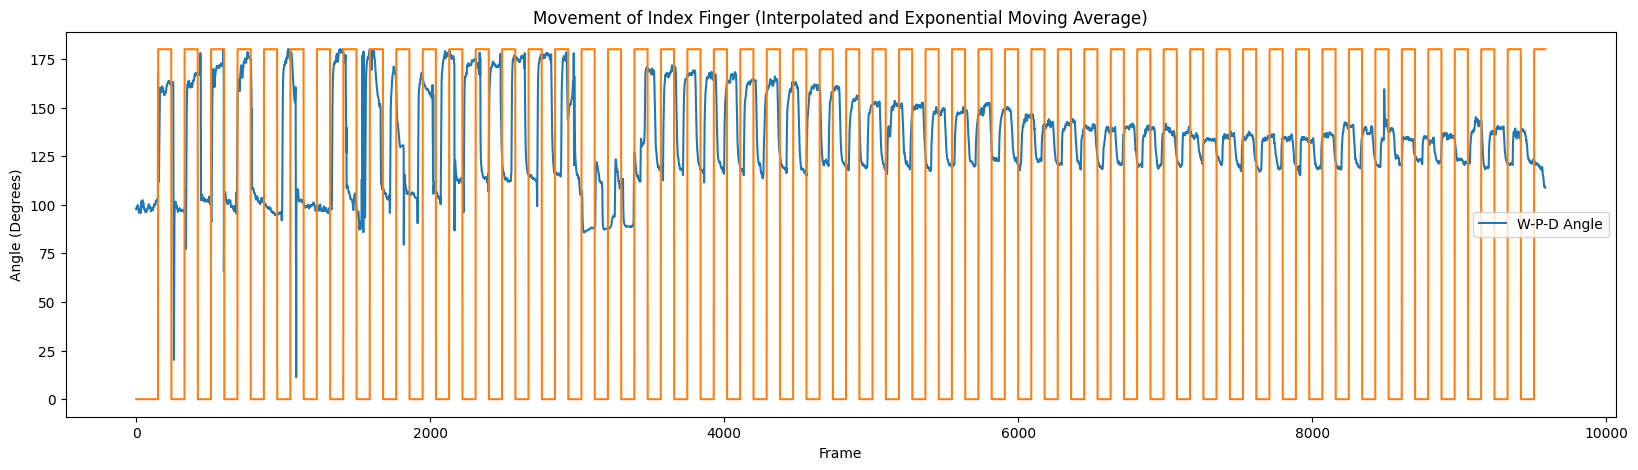

In [16]:
plt.figure(figsize=(20,5))
# plt.plot(index, label = "W-M-P Angle")
plt.plot(index2, label = "W-P-D Angle")
plt.plot(stim)
plt.legend()
plt.xlabel("Frame")
# plt.yscale('log')
plt.ylabel("Angle (Degrees)")
plt.title("Movement of Index Finger (Interpolated and Exponential Moving Average)")
plt.show()

In [122]:
data = pd.read_csv("/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/videos/MVI_0401DLC_resnet50_FES_V1Oct16shuffle1_38000.csv", skiprows=3, header=None)

def interpolate(df, x, y, likelihood):
    for i in range(1, len(df)):
        if df.iloc[i, likelihood] < threshold:
            df.iloc[i, x] = df.iloc[i-1, x]
            df.iloc[i, y] = df.iloc[i-1, y]

threshold = 0.5
for i in range(1,len(data.columns),3):
    likelihood = i + 2  
    x_col = i  
    y_col = i + 1  
    interpolate(data, x_col, y_col, likelihood)
data.head()
window =5
span = 5
#moving average
for i in range(1, len(data.columns),3):
    x = data.columns[i]
    y = data.columns[i+1]

    # x_ma = data[x].rolling(window=window, min_periods=1).mean()
    # y_ma = data[y].rolling(window=window, min_periods=1).mean()

    x_ma = data[x].ewm(span=span, adjust=False).mean()
    y_ma = data[y].ewm(span=span, adjust=False).mean()

    data[x] = x_ma
    data[y] = y_ma
    
data.head()


clipTime = 10 # seconds
clipLength = clipTime * 30 

# Open the video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error opening video file")

# Set up the writer object to write your video
writer = FFMpegWriter(fps=30)

# Create a figure for plotting
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

# Prepare the video file to write to
with writer.saving(fig, "/home/jakejoseph/Desktop/figures/interpMA.mp4", 100):
    i = 0

    while cap.isOpened() and i < clipLength:
        ret, frame = cap.read()
        if not ret:
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Get the x and y coordinates for the five points
        forearm = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
        wrist = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
        mcp = (data.iloc[i][data.columns[7]], data.iloc[i][data.columns[8]])
        pip = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
        dip = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])

        # Unpack the points into x and y coordinates
        x = [forearm[0], wrist[0], mcp[0], pip[0], dip[0]]
        y = [forearm[1], wrist[1], mcp[1], pip[1], dip[1]]

        # Plotting on the frame
        ax.imshow(frame_rgb)
        ax.plot(x, y, marker='o', c='white')
        ax.axis('off')
        
        # Write the current frame to the video
        writer.grab_frame()
        ax.clear()

        i += 1

# Release the video capture object and close the figure
cap.release()
plt.close(fig)